In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [6]:
# Set up file paths
os.chdir('/Users/nsusser/Desktop/Github/happyDB/')
# Load data 
input_path = 'analysis_data/results - factors.csv'
results = pd.read_csv(input_path)

In [24]:
# Create a mapping from Factor_# to human-readable names
factor_label_map = {
    "Factor_1": "Positive Emotions",
    "Factor_2": "Meaning and Mastery",
    "Factor_3": "Negative attitudes toward life",
    "Factor_4": "Relationships-Close and Deep",
    "Factor_5": "Prosocial Behavior-Empathy for suffering",
    "Factor_6": "Engagement",
    "Factor_7": "Health",
    "Factor_8": "Autonomy",
    "Factor_9": "Vitality",
    "Factor_10": "Community & Belonging",
    "Factor_11": "Learning and Growth",
    "Factor_12": "Negative Emotions",
    "Factor_13": "Emotional Stability",
    "Factor_14": "Loneliness/Independence",
    "Factor_15": "Relationships-Support",
    "Factor_16": "Autonomy-Engagement",
    "Factor_17": "Life Satisfaction",
    "Factor_18": "Relationships-Trust and Respect",
    "Factor_19": "Negative feelings toward self",
    "Factor_20": "Optimism",
    "Factor_21": "Resilience"
}

# Rename only the factor columns
results.rename(columns=factor_label_map, inplace=True)

factor_df = results.iloc[:, [1, 2] + list(range(-21, 0))]
factor_df.head()

,hmid,cleaned_hm,Positive Emotions,Meaning and Mastery,Negative attitudes toward life,Relationships-Close and Deep,Prosocial Behavior-Empathy for suffering,Engagement,Health,Autonomy,...,Negative Emotions,Emotional Stability,Loneliness/Independence,Relationships-Support,Autonomy-Engagement,Life Satisfaction,Relationships-Trust and Respect,Negative feelings toward self,Optimism,Resilience
0,27673,I went on a successful date with someone I fel...,0.339180,0.437745,-0.057690,0.906192,0.501828,0.427236,-0.311548,1.372047,...,1.284610,-0.089373,1.029016,1.396056,-0.237275,0.098863,1.209403,0.183206,-0.111082,0.445893
1,27674,I was happy when my son got 90% marks in his e...,0.989275,-0.205988,-0.429637,-0.328788,0.676607,-1.094066,-1.881865,-1.389394,...,-1.095274,-1.407321,-1.279183,1.814661,1.024059,1.517577,-1.111301,0.280118,-0.866203,-0.748348
2,27675,I went to the gym this morning and did yoga.,-1.279310,0.998694,-0.609427,-0.813609,-0.415163,0.047907,1.849796,0.115974,...,-0.322062,0.012990,0.293794,-0.420337,0.890426,0.626990,-0.094256,0.785793,-0.443137,-0.225095
3,27676,We had a serious talk with some friends of our...,0.334278,0.488914,1.891157,1.679246,1.546247,-1.023636,0.015420,1.892245,...,0.090196,0.747293,1.300113,-0.928223,1.290432,-1.758531,-0.576696,-2.800375,-1.102448,-0.246136
4,27677,I went with grandchildren to butterfly display...,-0.123233,-0.247800,-1.088872,0.598722,0.125059,1.170942,1.178237,-0.722430,...,0.266192,0.358138,-0.620239,-0.017194,-0.438795,0.172262,-1.581941,-0.407391,0.246818,-0.509145


In [8]:
threshold = 0.8
filtered_sentences = {factor: factor_df.loc[factor_df[factor] > threshold, ['hmid', 'cleaned_hm']] for factor in factor_df.columns[2:]}
filtered_sentences.keys()

dict_keys(['Positive Emotions', 'Meaning and Mastery', 'Negative attitudes toward life', 'Factor_4', 'Prosocial Behavior-Empathy for suffering', 'Engagement', 'Health', 'Autonomy', 'Vitality', 'Community & Belonging', 'Learning and Growth', 'Negative Emotions', 'Emotional Stability', 'Loneliness/Independence', 'Relationships-Support', 'Autonomy-Engagement', 'Life Satisfaction', 'Relationships-Trust and Respect', 'Negative feelings toward self', 'Optimism', 'Resilience'])

In [9]:
factor_counts = {factor: len(filtered_sentences[factor]) for factor in filtered_sentences}
factor_counts

{'Positive Emotions': 15439,
 'Meaning and Mastery': 24179,
 'Negative attitudes toward life': 16210,
 'Factor_4': 25419,
 'Prosocial Behavior-Empathy for suffering': 10206,
 'Engagement': 21804,
 'Health': 18912,
 'Autonomy': 21256,
 'Vitality': 19632,
 'Community & Belonging': 18286,
 'Learning and Growth': 17582,
 'Negative Emotions': 13052,
 'Emotional Stability': 17749,
 'Loneliness/Independence': 16246,
 'Relationships-Support': 17030,
 'Autonomy-Engagement': 16735,
 'Life Satisfaction': 18130,
 'Relationships-Trust and Respect': 18224,
 'Negative feelings toward self': 11334,
 'Optimism': 18264,
 'Resilience': 16485}

In [10]:
sentences = pd.read_csv('dataframes/clean_sentences.csv')
sentences.head()


,hmid,reflection_period,cleaned_hm
0,27673,24h,I went on a successful date with someone I fel...
1,27674,24h,I was happy when my son got 90% marks in his e...
2,27675,24h,I went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...


In [11]:
# Merge factor data with sentences on 'hmid' to include 'reflection_period'
merged_df = factor_df.merge(sentences[['hmid', 'reflection_period']], on='hmid', how='inner')

# Z-score factor columns (excluding 'hmid' and 'cleaned_hm')
factor_columns = factor_df.columns[2:]  # Assuming first two columns are 'hmid' and 'cleaned_hm'
merged_df[factor_columns] = merged_df[factor_columns].apply(zscore, axis=0)


# Initialize dictionary to store normalized counts by factor and reflection period
factor_percentages_by_period = {}
factor_counts_by_period = {}

# Get total number of sentences per reflection period
total_sentences_per_period = merged_df['reflection_period'].value_counts().to_dict()

# Loop through each factor and compute normalized percentages
for factor in factor_df.columns[2:]:  # Skip 'hmid' and 'cleaned_hm'
    filtered_df = merged_df[merged_df[factor] >= .8]  # Apply threshold

    # Count occurrences per reflection period
    counts = filtered_df.groupby('reflection_period').size().to_dict()
    
    # Normalize by total sentences per period
    percentages = {period: (counts.get(period, 0) / total_sentences_per_period[period]) * 100 
                   for period in total_sentences_per_period}
    
    #store counts in dictionary
    factor_counts_by_period[factor] = counts
    
    # Store result in dictionary
    factor_percentages_by_period[factor] = percentages

# Print the results
factor_percentages_by_period


{'Positive Emotions': {'3m': 18.830374753451675, '24h': 12.435524335173106},
 'Meaning and Mastery': {'3m': 27.57790927021696, '24h': 20.820873055694932},
 'Negative attitudes toward life': {'3m': 17.497041420118343,
  '24h': 15.175112895132967},
 'Factor_4': {'3m': 26.2465483234714, '24h': 24.836929252383342},
 'Prosocial Behavior-Empathy for suffering': {'3m': 11.36094674556213,
  '24h': 10.007024586051179},
 'Engagement': {'3m': 22.615384615384613, '24h': 23.102860010035123},
 'Health': {'3m': 18.550295857988168, '24h': 21.67185148018063},
 'Autonomy': {'3m': 23.96844181459566, '24h': 21.627696939287507},
 'Vitality': {'3m': 20.664694280078898, '24h': 21.455092824887103},
 'Community & Belonging': {'3m': 23.157790927021697,
  '24h': 17.336678374310086},
 'Learning and Growth': {'3m': 21.244575936883628, '24h': 16.80481685900652},
 'Negative Emotions': {'3m': 15.91518737672584, '24h': 12.660311088810838},
 'Emotional Stability': {'3m': 17.842209072978303, '24h': 23.092824887104868},


In [12]:
per = pd.DataFrame(factor_percentages_by_period).T
print(per)

                                                 3m        24h
Positive Emotions                         18.830375  12.435524
Meaning and Mastery                       27.577909  20.820873
Negative attitudes toward life            17.497041  15.175113
Factor_4                                  26.246548  24.836929
Prosocial Behavior-Empathy for suffering  11.360947  10.007025
Engagement                                22.615385  23.102860
Health                                    18.550296  21.671851
Autonomy                                  23.968442  21.627697
Vitality                                  20.664694  21.455093
Community & Belonging                     23.157791  17.336678
Learning and Growth                       21.244576  16.804817
Negative Emotions                         15.915187  12.660311
Emotional Stability                       17.842209  23.092825
Loneliness/Independence                   18.822485  19.861515
Relationships-Support                     20.055227  17

In [13]:
counts = pd.DataFrame(factor_counts_by_period).T
print(counts)
counts.to_csv('analysis_data/factor_counts_by_period.csv')

                                            24h     3m
Positive Emotions                          6196   9547
Meaning and Mastery                       10374  13982
Negative attitudes toward life             7561   8871
Factor_4                                  12375  13307
Prosocial Behavior-Empathy for suffering   4986   5760
Engagement                                11511  11466
Health                                    10798   9405
Autonomy                                  10776  12152
Vitality                                  10690  10477
Community & Belonging                      8638  11741
Learning and Growth                        8373  10771
Negative Emotions                          6308   8069
Emotional Stability                       11506   9046
Loneliness/Independence                    9896   9543
Relationships-Support                      8712  10168
Autonomy-Engagement                       10120   9761
Life Satisfaction                          9685  10468
Relationsh

stopwords_map = {'Positive Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally got',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Meaning and Mastery': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got good',
  'got job',
  'got new',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really good',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative attitudes toward life': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'day school',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'friend haven',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'memorable day',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really felt',
  'really happy',
  'school friend',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Close, loving relationships': {'24 hours',
  'best friend',
  'came visit',
  'day life',
  'extremely happy',
  'family members',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'high school',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'old friend',
  'past 24',
  'past months',
  'really happy',
  'time family',
  'weeks ago',
  'year old'},
 'Prosocial Behavior-Empathy for suffering': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy happy',
  'happy moment',
  'happy past',
  'happy seeing',
  'happy time',
  'long time',
  'make happy',
  'make roti',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'rs 3000',
  'weeks ago',
  'year old'},
 'Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Health': {'24 hours',
  'able sleep',
  'bike ride',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got home',
  'got sleep',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'long walk',
  'makes happy',
  'moment life',
  'months ago',
  'night sleep',
  'past 24',
  'past months',
  'really happy',
  'took dog',
  'weeks ago',
  'went gym',
  'year old'},
 'Autonomy': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'purchased new',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went dinner',
  'went movie',
  'went shopping',
  'year old'},
 'Vitality': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'colleagues great',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'offsite colleagues',
  'past 24',
  'past months',
  'presented new',
  'really happy',
  'spent time',
  'surprise given',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Community & Belonging': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got accepted',
  'got job',
  'got married',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new house',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'team won',
  'video game',
  'weeks ago',
  'went shopping',
  'won game',
  'year old'},
 'Learning and Growth': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'fun stimulating',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'stimulating discussions',
  'tried new',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'exam time',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'job interview',
  'job offer',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'moved new',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'romantic date',
  'seen years',
  'spent time',
  'video game',
  'weeks ago',
  'went date',
  'went shopping',
  'year old'},
 'Emotional Stability': {'24 hours',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'good time',
  'got work',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'really nice',
  'weeks ago',
  'work today',
  'year old'},
 'Loneliness/Independence': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'friend hadn',
  'friend haven',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'met old',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'seen long',
  'seen long time',
  'seen years',
  'weeks ago',
  'year old'},
 'Relationships-Support': {'24 hours',
  'daughter',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'happy son',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'mother day',
  'old son',
  'past 24',
  'past months',
  'really happy',
  'son got',
  'weeks ago',
  'year old'},
 'Autonomy-Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Life Satisfaction': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'went temple',
  'year old'},
 'Relationships-Trust and Respect': {'24 hours',
  'big hug',
  'bonus work',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got free',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really happy',
  'weeks ago',
  'year old'},
 'Negative feelings toward self': {'24 hours',
  'able pay',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'finally passed',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lost pounds',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Optimism': {'24 hours',
  'baby girl',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'gave birth',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'looking forward',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Resilience': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'event happy past',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'}}

In [36]:


universal_stopwords = {
    "with my", "in the", "made me", "it was", "went to", "able to", "of my", "me happy", "in my", "for the",
    "of the", "very happy", "to the", "made me happy", "to my", "on the", "and it", "was able", "was able to",
    "to see", "for my", "one of", "at the", "got to", "the first", "my son", "was happy", "my life",
    "was very",  "on my", "and we", "was so happy", "to be happy", "to be able", "was so happy", "was so", "was very happy",
    "and was", "to be", "happy to", "happy when",  "first time", "that made", "to get",
    "the first time", "the day", "going to", "to go", "that made me", "for the first", "at work", "last night",
    "for me", "me and", "and the", "that was", "and my", "we had", "found out",
    "so happy", "it made", "to me", "when my",  "me to", "was so", 
    "and had", "it made me", "long time",  "this morning", "told me", "was happy when",
    "have been",  "lot of", "had been", "the past", "from my", "time with",
    "to do", "she was", "in my life", "bought new", "and she", "one of my",
    "and it was", "event that",  "makes me", "at my",  "time in",
    "out of", "happiest moment", "gave me", "that my", "it is", "to temple",
    "went for", "seen in", "went out", "woke up", "out to", "an old", 
    "year old", "that had", "event that made", "with her",  "me feel",
    "to help",  "have to", "how to", "went on", "went to the", "out that", "talked to", 
    "go to", "and got",  "with me", "see my",  "he was", "haven seen",
    "after long", "of my favorite", "and he","i", "my", "was", "to", "the", "a", "is", "in", "of", "for", "that", "it", "on",
    "with", "and", "at", "as", "by", "an", "be", "this", "wasn't", "we", "so", "from",
    "there", "but", "what", "who", "when", "where", "which", "if", "then", "they", "them",
    "their", "these", "those", "he", "she", "my", "you", "your", "his", "her", "its",
    "our", "its", "me", "us", "him", "her", "them", "that", "these", "those",
    "such", "more", "most", "some", "any", "no", "none", "all", "both", "few",
    "many", "much", "little", "less", "least", "other", "another", "same", "same as",
    "different", "different from", "same as", "like", "unlike", "similar", "opposite",
    "same", "different", "more than", "less than", "greater than", "smaller than",
    "better than", "worse than", "equal to", "not equal to", "between", "among",
    "before", "after", "during", "while", "until", "since", "for", "ago", "about",
    "around", "through", "across", "along", "with", "without", "within", "outside",
    "above", "below", "under", "over", "between", "among", "against", "toward",
    "towards", "alongside", "beside", "next to", "near", "far", "close to",
    "away from", "toward", "towards", "against", "alongside", "beside", "next to",
    "near", "far", "close to", "away from", "toward", "towards", "against",
    "alongside", "beside", "next to", "near", "far", "close to", "away from",
    "toward", "towards", "against", "alongside", "beside", "next to", "near",
    "far", "close to", "away from", "toward", "towards", "against", "alongside",
    "beside", "next to", "near", "far", "close to", "away from", "toward", "got",
    "made", "time", "happy", "had", "see", "want", "go", "know", "think", "feel",
    "say", "tell", "give", "take", "make", "do", "have", "be", "is", "are",
    "was", "were", "will", "would", "can", "could", "should", "may", "might",
    "must", "shall", "ought", "need", "want", "like", "love", "hate", "prefer","have",
    "day", "s", "S", "time", "thing", "things", "one", "two", "three", "four", "five", "went", "out"
}


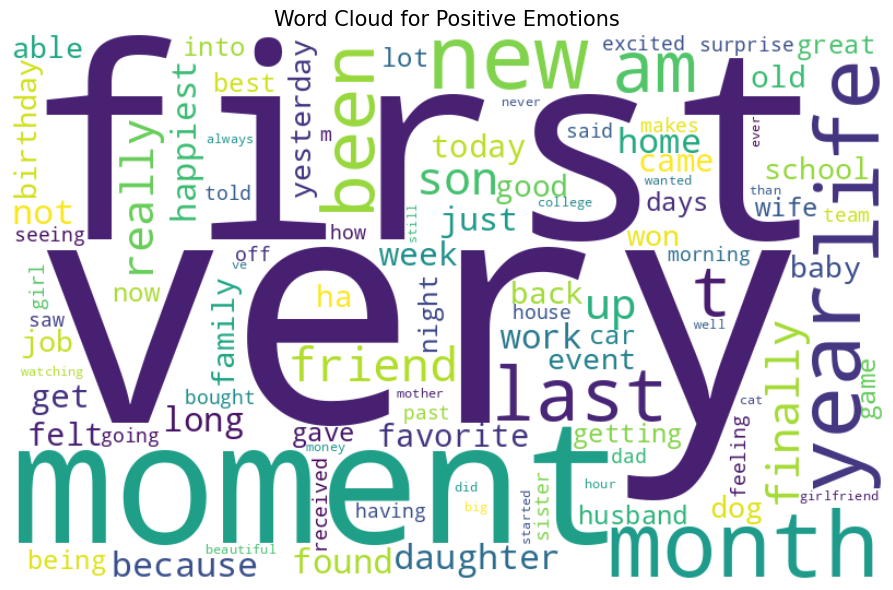

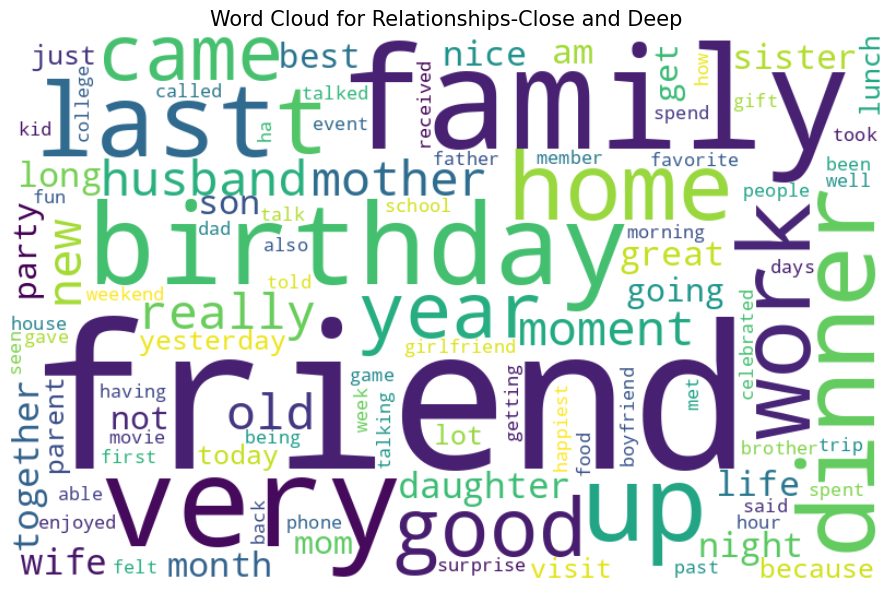

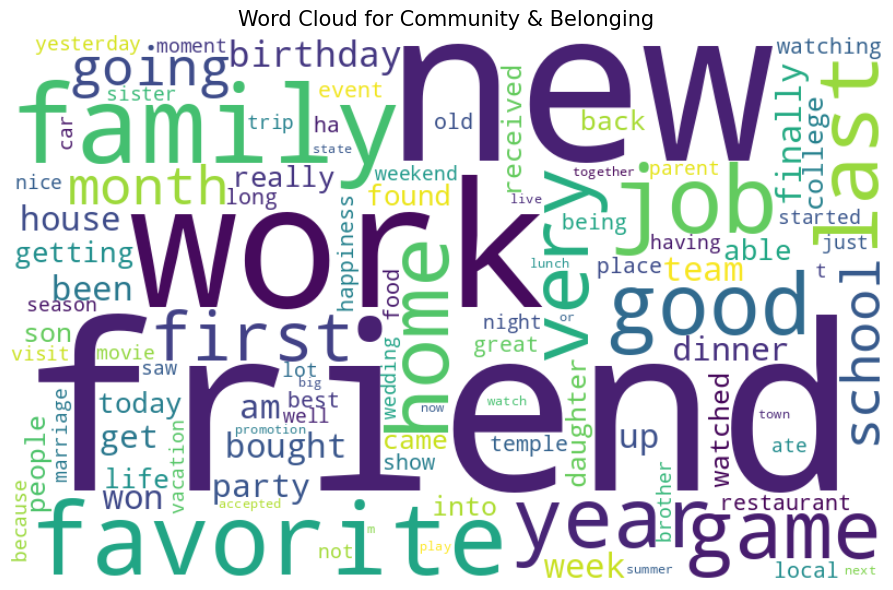

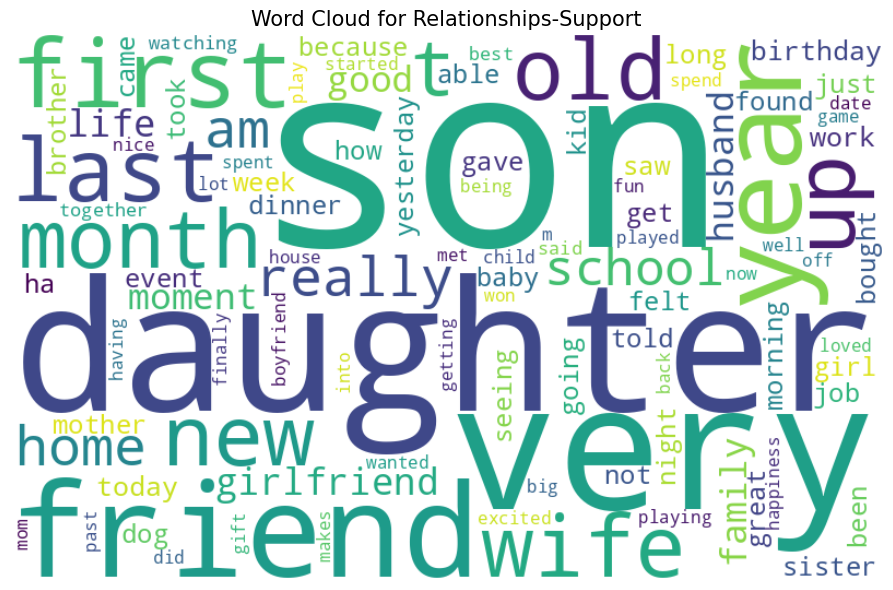

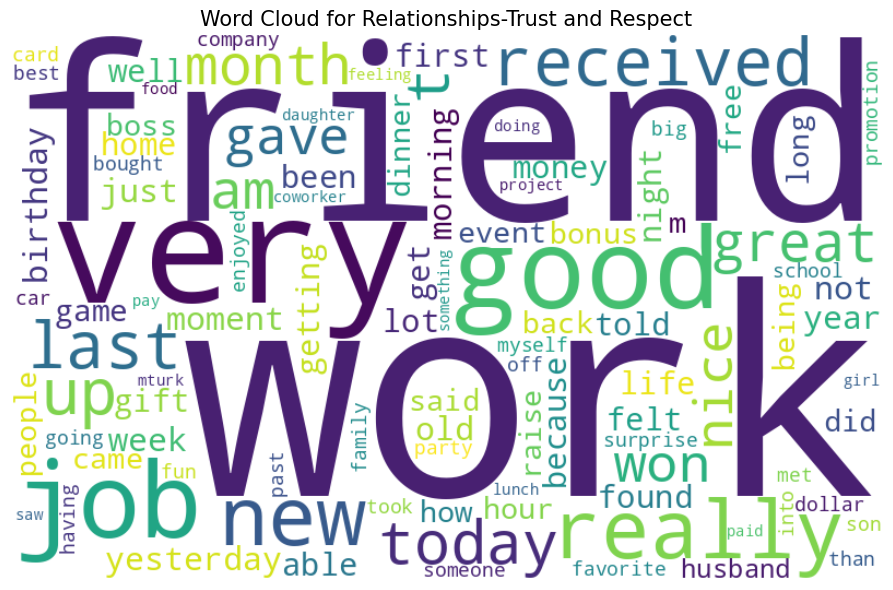

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Function to clean text by removing special characters and converting to lowercase
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Generate a word cloud from text data
def generate_word_cloud(text_data, title=None, stopwords=None, colormap='viridis', 
                       max_words=100, width=800, height=500):
    """
    Generate a word cloud from text data.
    """
    # If stopwords is None, create an empty set
    if stopwords is None:
        stopwords = set()
    
    # Create the word cloud
    wc = WordCloud(
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        colormap=colormap,
        stopwords=stopwords,
        random_state=42,
        collocations=False,
        prefer_horizontal=0.9,
        min_font_size=8
    )
    
    # Generate word cloud based on input type
    if isinstance(text_data, dict) and text_data:  # Check if dictionary is not empty
        try:
            wc.generate_from_frequencies(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your stopwords filter.")
            # Return a blank word cloud object
            return None
    elif isinstance(text_data, str) and text_data.strip():  # Check if string is not empty
        try:
            wc.generate(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your text data.")
            return None
    else:
        print(f"No valid data for word cloud: {title}")
        return None
    
    # Create the figure and plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    if title:
        plt.title(title, fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    return wc

# Create a word cloud from factor data
def create_factor_word_cloud(df, factor_column, threshold=0.8, text_column='cleaned_hm', 
                            stopwords=None):
    """
    Create a word cloud for entries with high values in a specific factor column.
    """
    if factor_column not in df.columns:
        print(f"Factor column '{factor_column}' not found in the dataframe")
        return None
    
    # Filter the dataframe for the selected factor
    factor_texts = df[df[factor_column] > threshold][text_column].dropna()
    
    if factor_texts.empty:
        print(f"No texts found for factor '{factor_column}' with threshold {threshold}")
        return None
    
    # Clean and combine texts
    cleaned_texts = [clean_text(text) for text in factor_texts]
    combined_text = ' '.join(cleaned_texts)
    
    if not combined_text.strip():
        print(f"No valid text content for factor '{factor_column}'")
        return None
    
    # Generate the word cloud
    return generate_word_cloud(
        combined_text,
        title=f'Word Cloud for {factor_column}',
        stopwords=stopwords,
        colormap='viridis'
    )

# Create a word cloud from word frequencies
def create_frequency_word_cloud(word_freq_dict, title="Word Frequency Cloud", stopwords=None):
    """
    Create a word cloud from a dictionary of word frequencies
    """
    if not word_freq_dict:
        print("Word frequency dictionary is empty")
        return None
    
    # Filter out stopwords if provided
    if stopwords:
        word_freq_dict = {word: freq for word, freq in word_freq_dict.items() 
                         if word.lower() not in stopwords}
    
    if not word_freq_dict:
        print("No words left after stopword filtering")
        return None
    
    # Generate the word cloud
    return generate_word_cloud(word_freq_dict, title=title, colormap='plasma')

# For demonstration, here's how to use the functions:
# 1. To create a word cloud for a specific factor
# create_factor_word_cloud(factor_df, 'Close, loving relationships', stopwords=universal_stopwords)

# 2. To create a word cloud from word frequencies
# word_frequencies = {"happy": 120, "family": 95, "friends": 85, "success": 75}
# create_frequency_word_cloud(word_frequencies, "Most Common Words", stopwords=universal_stopwords)

# 3. To create a word cloud from raw text
def create_text_word_cloud(text, title="Text Word Cloud", stopwords=None):
    """
    Create a word cloud from raw text
    """
    if not text or not text.strip():
        print("Text input is empty")
        return None
    
    cleaned_text = clean_text(text)
    
    if not cleaned_text:
        print("No valid text content after cleaning")
        return None
    
    return generate_word_cloud(cleaned_text, title=title, stopwords=stopwords, colormap='viridis')

# For example, to create a word cloud for "Positive Emotions"
create_factor_word_cloud(factor_df, 'Positive Emotions', stopwords=universal_stopwords)

# Or for "Relationships-Close and Deep"
create_factor_word_cloud(factor_df, 'Relationships-Close and Deep', stopwords=universal_stopwords)

create_factor_word_cloud(factor_df, 'Community & Belonging', stopwords=universal_stopwords)

create_factor_word_cloud(factor_df, 'Relationships-Support', stopwords=universal_stopwords)

create_factor_word_cloud(factor_df, 'Relationships-Trust and Respect', stopwords=universal_stopwords)
